In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [143]:
# trainデータ
train = pd.read_csv('train.csv')
# testデータ
test = pd.read_csv('test.csv')

In [144]:
train.head()

# test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [145]:
train.loc[:6,['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF']]

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF
0,7,1710,2,548,856,856
1,6,1262,2,460,1262,1262
2,7,1786,2,608,920,920
3,7,1717,3,642,756,961
4,8,2198,3,836,1145,1145
5,5,1362,2,480,796,796
6,8,1694,2,636,1686,1694


In [146]:
# 相関を調べる
corr = train.corr()
corr_dict = corr["SalePrice"].to_dict()
corr_dict.pop("SalePrice")
sorted_corr_list = sorted(corr_dict.items(), key=lambda x:x[1] * x[1])
sorted_corr_list[-6:]

[('1stFlrSF', 0.6058521846919166),
 ('TotalBsmtSF', 0.6135805515591944),
 ('GarageArea', 0.6234314389183598),
 ('GarageCars', 0.640409197258349),
 ('GrLivArea', 0.7086244776126511),
 ('OverallQual', 0.7909816005838047)]

In [147]:
X = train.loc[:,['OverallQual', 'GrLivArea', 'GarageCars']].values
y = train.loc[:, ['SalePrice']].values.reshape(-1)

In [148]:
# データの標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [149]:
print(X_std.mean())
print(X_std.std())

3.690604392361251e-17
1.0


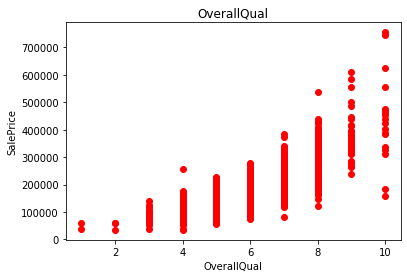

In [150]:
plt.scatter(X[:,0], y, c='red')
plt.title('OverallQual')                      
plt.xlabel('OverallQual')                               
plt.ylabel('SalePrice')                               
plt.show()                                    

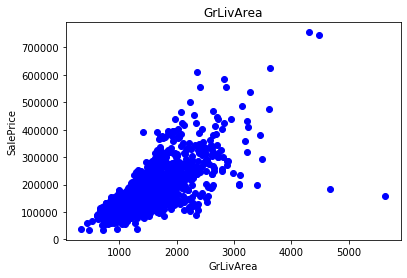

In [151]:
plt.scatter(X[:,1], y, c='blue')
plt.title('GrLivArea')                      
plt.xlabel('GrLivArea')                               
plt.ylabel('SalePrice')                               
plt.show()

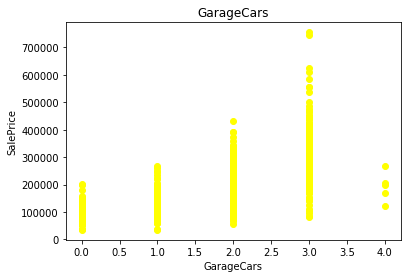

In [152]:
plt.scatter(X[:,2], y, c='yellow')
plt.title('GarageCars')                      
plt.xlabel('GarageCars')                               
plt.ylabel('SalePrice')                               
plt.show()

In [153]:
# データの分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=0)

In [79]:
# from sklearn.svm import SVC
# from sklearn import metrics

# # カーネルSVMによる学習
# # gamma: 決定曲線の複雑さ
# # C: 誤分類への厳し
# svm = SVC(kernel='rbf', gamma=0.1, C=10)
# svm.fit(X_train, y_train)
# print('trainデータ：' + str(metrics.accuracy_score(y_train, svm.predict(X_train))))
# print('testデータ：' + str(metrics.accuracy_score(y_test, svm.predict(X_test))))

ValueError: Found input variables with inconsistent numbers of samples: [1460, 1022]

In [154]:
# 重回帰の線形回帰を実行
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# 学習
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [155]:
lr.score(X_train, y_train)

0.7488001016603221

In [156]:
lr.score(X_test, y_test)

0.717192201661816

In [157]:
val = [0.0, 1.0,2.0,3.0,4.0,5.0]

for i, j in enumerate(test.loc[:,['GarageCars']].values):
    if j not in val:
        print(i)

print(test.loc[1116,['GarageCars']])

1116
GarageCars    NaN
Name: 1116, dtype: object


In [158]:
test.loc[1116, ['OverallQual', 'GrLivArea', 'GarageCars']]

OverallQual       5
GrLivArea      1828
GarageCars      NaN
Name: 1116, dtype: object

In [159]:
test.loc[1116, ['GarageCars']] = 2.0

In [160]:
# testデータからデータの取り出し
test_data = test.loc[:, ['OverallQual', 'GrLivArea', 'GarageCars']].values
# 標準化
scaler = StandardScaler()
test_data_std = scaler.fit_transform(test_data)
# 提出データの予測
y_pred = lr.predict(test_data_std)

In [161]:
# 提出csvファイルの作成
submit_file = pd.DataFrame({'Id' : test['Id'], 'SalePrice' : y_pred})
submit_file.to_csv('submit.csv', index = False)